<a href="https://colab.research.google.com/github/cientistaguiantunes/Machine_Learning-Regress-o_Linear/blob/main/Machine_Learning_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#bibliotecas externas 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Base_Dados = pd.read_excel('/content/drive/MyDrive/Base_estudos/BaseDados_RegressaoLinear.xlsx', 'Plan1')
Base_Dados

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000
...,...,...
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147


In [4]:
Base_Dados.head()

,Salario,Limite_Emprestimo
0,1250.219130,2900.124323
1,1262.721321,2929.125566
2,1275.348535,2958.416822
3,1288.102020,2988.000990
4,1300.983040,3017.881000


In [5]:
Base_Dados.columns

Index(['Salario', 'Limite_Emprestimo'], dtype='object')

In [6]:
Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Salario            99 non-null     float64
 1   Limite_Emprestimo  99 non-null     float64
dtypes: float64(2)
memory usage: 1.7 KB


In [7]:
Base_Dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


In [8]:
#converter para um array 
Eixo_x = Base_Dados.iloc[:,0].values
Eixo_y = Base_Dados.iloc[:,1].values

In [9]:
Eixo_x

array([1250.21913   , 1262.7213213 , 1275.34853451, 1288.10201986,
       1300.98304006, 1313.99287046, 1327.13279916, 1340.40412715,
       1353.80816843, 1367.34625011, 1381.01971261, 1394.82990974,
       1408.77820883, 1422.86599092, 1437.09465083, 1451.46559734,
       1465.98025331, 1480.64005585, 1495.4464564 , 1510.40092097,
       1525.50493018, 1540.75997948, 1556.16757927, 1571.72925507,
       1587.44654762, 1603.32101309, 1619.35422323, 1635.54776546,
       1651.90324311, 1668.42227554, 1685.1064983 , 1701.95756328,
       1718.97713891, 1736.1669103 , 1753.52857941, 1771.0638652 ,
       1788.77450385, 1806.66224889, 1824.72887138, 1842.97616009,
       1861.4059217 , 1880.01998091, 1898.82018072, 1917.80838253,
       1936.98646635, 1956.35633102, 1975.91989433, 1995.67909327,
       2015.6358842 , 2035.79224305, 2056.15016548, 2076.71166713,
       2097.4787838 , 2118.45357164, 2139.63810736, 2161.03448843,
       2182.64483331, 2204.47128165, 2226.51599446, 2248.78115

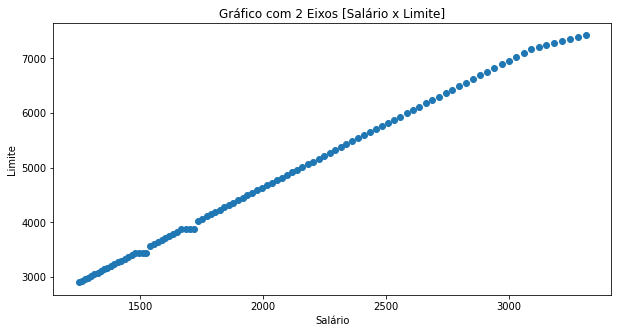

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(Eixo_x, Eixo_y);
plt.title('Gráfico com 2 Eixos [Salário x Limite]')
plt.xlabel('Salário')
plt.ylabel('Limite');

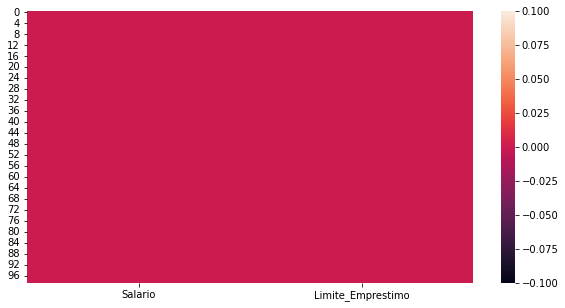

In [15]:
plt.figure(figsize=(10,5))
sns.heatmap(Base_Dados.isnull());

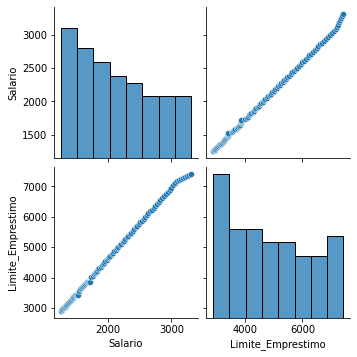

In [16]:
sns.pairplot(Base_Dados);

In [17]:
Correlação = np.corrcoef(Eixo_x, Eixo_y)
Correlação

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

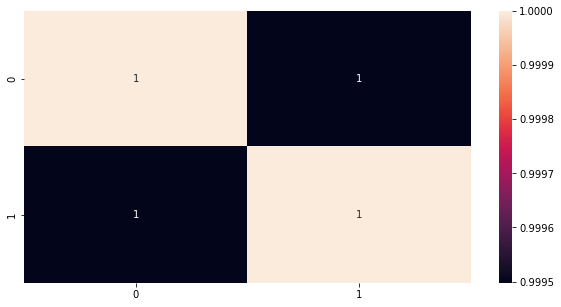

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(Correlação, annot=True);

In [19]:
Eixo_x = Eixo_x.reshape(-1, 1)
Eixo_y = Eixo_y.reshape(-1, 1)

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    Eixo_x,
    Eixo_y,
    test_size=0.20
)

In [22]:
print(len(x_train), len(x_test))

79 20


In [23]:
from sklearn.linear_model import LinearRegression

Funcao_Regressao = LinearRegression()

Funcao_Regressao.fit(x_train, y_train)

LinearRegression()

In [28]:
Funcao_Regressao.score(x_train, y_train)

0.99909929293913

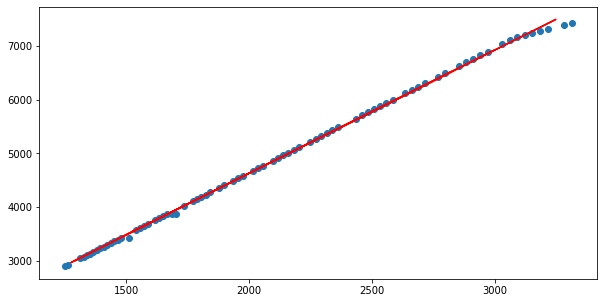

In [25]:
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train)
plt.plot(x_test, Funcao_Regressao.predict(x_test), color='red');

In [26]:
Previsões = Funcao_Regressao.predict(x_test)

from sklearn import metrics
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, Previsões)))

RMSE 51.51632587461092


In [30]:
print(Funcao_Regressao.predict([[1800]]))

[[4172.35389957]]
